# Centrality in graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


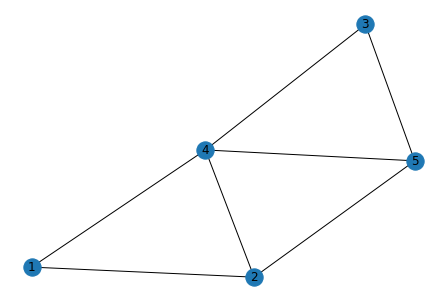

In [2]:
G = nx.Graph()
G.add_edge(1, 4)
G.add_edge(1, 2)
G.add_edge(2, 5)
G.add_edge(4, 5)
G.add_edge(2, 4)
G.add_edge(4, 3)
G.add_edge(3, 5)
nx.draw(G, pos = nx.spring_layout(G), with_labels = 1)
plt.show()

In [3]:
print(len(G))
print(G.nodes())

5
[1, 4, 2, 5, 3]


In [4]:
d1 = list(G.degree(G.nodes()))
print(d1)

[(1, 2), (4, 4), (2, 3), (5, 3), (3, 2)]


In [5]:
degrees = [val for (node, val) in G.degree()] 
nodes =  [node for (node, val) in G.degree()]
print("Nodes in graph:",nodes)
print("Degrees of nodes:",degrees)

Nodes in graph: [1, 4, 2, 5, 3]
Degrees of nodes: [2, 4, 3, 3, 2]


In [6]:
print("Max degree value:",max(degrees))
print("Position of max degree:",degrees.index(max(degrees)))
pos = degrees.index(max(degrees))
print("Max degree node:",nodes[pos])
cent = max(degrees) / (len(G)-1)
print("Degree of centrality of node",nodes[pos],"is",cent)

Max degree value: 4
Position of max degree: 1
Max degree node: 4
Degree of centrality of node 4 is 1.0


Degree centrality.

In [7]:
def degree_centrality(G):
    degrees = [val for (node, val) in G.degree()] 
    nodes =  [node for (node, val) in G.degree()]
    print("Nodes\tDegree centrality\n")
    for i in range(0, len(G)):
        c = degrees[i] / (len(G)-1)
        print(nodes[i],"\t\t",c,"\n")

In [8]:
degree_centrality(G)

Nodes	Degree centrality

1 		 0.5 

4 		 1.0 

2 		 0.75 

5 		 0.75 

3 		 0.5 



Betweeness Centrality.

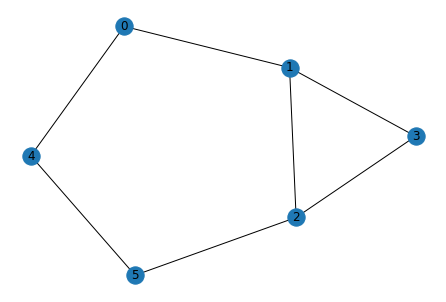

In [9]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,4)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(4,5)
nx.draw(G, pos = nx.spring_layout(G), with_labels=1)
plt.show()

Betweeness for node zero.

In [10]:
def betweeness_zero(G):
    centrality = 0
    count = 0
    leng = len(G.nodes())
    for i in range(1,leng):
        for j in range(i+1,leng):
            sp = nx.all_shortest_paths(G,i,j)
            k = 0
            count = 0
            for p in sp:
                bw = len(p)-2
                if bw >= 1:
                    x=1
                    while x <= bw:
                        if p[x] == 0:
                            count = count + 1
                        x = x + 1
                    k = k + 1
            if count >= 1 and k >= 1:
                centrality += count/k
    print(centrality)

In [11]:
betweeness_zero(G)

1.5


Betweeness for all nodes.

In [12]:
def betweeness_centrality(G,l):
    centrality = 0
    count = 0
    leng = len(G.nodes())
    for i in range(0,leng):
        if i == l:
            continue
        else:
            for j in range(i+1,leng):
                if j == l:
                    continue
                else:
                    sp = nx.all_shortest_paths(G,i,j)
                    k = 0
                    count = 0
                    for p in sp:
                        bw = len(p)-2
                        if bw >= 1:
                            x = 1
                            while x <= bw:
                                if p[x] == l:
                                    count = count + 1
                                x = x + 1
                            k = k + 1
                    if count >= 1 and k >= 1:
                        centrality += count/k
    return centrality

In [13]:
print("Nodes\tBetweeness centrality\n")
for i in range(0,len(G.nodes())):
    b = betweeness_centrality(G,i)
    print(i,"\t",b,"\n")

Nodes	Betweeness centrality

0 	 1.5 

1 	 2.5 

2 	 2.5 

3 	 0 

4 	 1.0 

5 	 1.5 



Closeness Centrality.

In [14]:
def closeness_centrality(G,l):
    sum = 0
    centrality = 0
    leng = len(G.nodes())
    for i in range(0,leng):
        sp = nx.shortest_path(G,i,l)
        sum += len(sp)-1
    centrality = sum/(leng-1)
    return centrality    

In [15]:
print("Nodes\tCloseness centrality\n")
for i in range(0,len(G.nodes())):
    c = closeness_centrality(G,i)
    print(i,"\t",c,"\n")

Nodes	Closeness centrality

0 	 1.6 

1 	 1.4 

2 	 1.4 

3 	 1.8 

4 	 1.8 

5 	 1.6 

